# Group Case Study : Loan Default Prediction 
#### Group Facilitator Name : Prabhat Mishra ( prabhatm0307@gmail.com)
#### Team Member: Deepanshu Pradhan (pradhand1@gmail.com)

## Exploratory Data Analysis (EDA) to understand Loan Default

#### Business Understanding

A consumer finance company specialised in lending various types of loans to urban customers. It is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

When a loan application is received by the company, the company must make a decision to approve the loan based on the profile of the applicant. Two kinds of risks are linked to the choice of the bank

1. If the applicant is inclined to repay the loan, then not approving the loan will result in a business loss to the company
2. If the applicant is unlikely to repay the loan, i.e. if the applicant is inclined to default, then approving the loan may result in a financial loss to the company.

If the firm approves the loan, there are three possible scenarios outlined below:

   i. <b>Fully paid</b>: Applicant has fully paid the loan (the principal and the interest rate)
   
   ii.<b>Current</b>: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed.
   
   iii.<b>Charged-off</b>: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

#### Objective

Lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). In other words, borrowers who default cause the largest amount of loss to the lenders.Such customers labelled as <b> 'charged-off' </b> are the <b>'defaulters'</b>. 

The objective is to understand the driving factors (or driver variables) behind loan default. The company can utilise this knowledge for its portfolio and risk assessment. 


# Exploratory Data Analysis (EDA) into below sections

#### 1. Data Sourcing

    1. Checking the encoding of the file
    2. Loading the data		

#### 2. Data Cleaning

    A. Null Values Analysis
        1. Identify and drop columns with 100% missing data
        2. Identify and drop columns with more than 80% missing data
        3. Identify and drop columns having single unique values as they will not any value to the analysis
        4. Identify and drop unnecessary columns (like text based, Applicant Loan Behaviour)

    B. Datatype Check 

    C. Datatype Conversion
        1. Converting text to float values like interest_rate, emp length
    
    D. Drop Records
        1. Drop Duplicates
        2. Drop records for current records
    
    E. Impute Null Values
    
    F. Derived Metrics
        1. Derive month and year from issue_date
        2. Derive loan amount and annual income ratio
        3. Adding target variable based on loan_status

#### 3. Univariate Analysis:
    
    A. Continuous Variables (Loan Amount, Annual Income, Interest Rate, DTI, Target Variable Default Percentage, Employee Length
	
    B. Categorical Variables ( Address State, Grade, Home Ownership, Issue year, Sub Grade, Purpose, Term, Verification Status 

#### 4. Bi/Multivariate Analysis:
	
    A. Heatmap for continuous variable
	
    B. Pair Plot for continuous variable
	
    C. Target Variable vs (Loan Amount, Annual Income, Interest Rate, DTI, Open Account, Derogatory Public Record, Employee Length, Address State, Grade, Home Ownership, Issue year, Sub Grade, Purpose, Term, Verification Status, Issue Month
	
    D. Issue month vs Purpose vs Target Variable
	
    E. Loan Amount Income Ratio, Interest vs Target Variable


#### 5. Conclusion

## 1. Data Sourcing
### i. Loading Data into dataframe

In [1]:
import pandas as pd
import numpy as np
import cufflinks as cf
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
from scipy import special 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sys
import cchardet as chardet
from pandas.api.types import is_string_dtype, is_numeric_dtype
from pandas_profiling import ProfileReport

sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
py.offline.init_notebook_mode(connected=True) # plotting in offilne mode 
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
pd.set_option('display.max_colwidth', 1) # make sure data and columns are displayed correctly withput purge
pd.options.display.float_format = '{:20,.2f}'.format # display float value with correct precision 
with open("loan.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
encoding=result['encoding']
print(encoding)

ASCII


In [2]:
encoding="UTF-8"
loan_df = pd.read_csv("loan.csv",low_memory = False,encoding = encoding)
loan_df.shape

(39717, 111)

In [3]:
loan_df.describe

<bound method NDFrame.describe of             id  member_id  loan_amnt  funded_amnt      funded_amnt_inv  \
0      1077501  1296599    5000       5000                    4,975.00   
1      1077430  1314167    2500       2500                    2,500.00   
2      1077175  1313524    2400       2400                    2,400.00   
3      1076863  1277178    10000      10000                  10,000.00   
4      1075358  1311748    3000       3000                    3,000.00   
...        ...      ...     ...        ...                         ...   
39712  92187    92174      2500       2500                    1,075.00   
39713  90665    90607      8500       8500                      875.00   
39714  90395    90390      5000       5000                    1,325.00   
39715  90376    89243      5000       5000                      650.00   
39716  87023    86999      7500       7500                      800.00   

             term int_rate          installment grade sub_grade  \
0       36

### ii. Defining Generic Functions for plotting and metadata

In [4]:
def plot_bar_chart(plotting_frame,x_column,y_column) :
            
        x_axis_title = x_column.title()
        y_axis_title = y_column.title()
        
        graph_title = "Bar Chart [" + x_axis_title.title() + " Vs " + y_axis_title.title() + "]"
        
        layout = go.Layout(
             title = graph_title,
             yaxis=dict(
                title=y_axis_title
             ),
             xaxis=dict(
                 title=x_axis_title
             )
        )

        data_to_be_plotted = [
            go.Bar(
                x=plotting_frame[x_column], 
                y=plotting_frame[y_column]
            )
        ]


        figure = go.Figure(data=data_to_be_plotted,layout=layout)
        py.offline.iplot(figure)
        
        
def plot_pie_chart(plotting_frame,x_column,y_column) : 
        
        labels = plotting_frame[x_column].tolist()
        values = plotting_frame[y_column].tolist()

        trace = go.Pie(labels=labels, values=values)

        py.offline.iplot([trace])

        
def plot_box_chart(dataframe) :
    data = []
    for index, column_name in enumerate(dataframe) :
        data.append(
        go.Box(
            y=dataframe.iloc[:, index],
            name=column_name
         ))   
        
    layout = go.Layout(
    yaxis=dict(
        title="Frequency",
        zeroline=False
    ),
       boxmode='group'
    )
    
    fig = go.Figure(data=data, layout=layout)    
    py.offline.iplot(fig) 
    
def plot_group_bar_chart(plot,col,hue) : 
    hue_col = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(plot[col].unique()) + 6 + 5*len(hue_col.unique())
    fig.set_size_inches(width , 10)
    ax = sns.countplot(data = loan_plot, x= col, order=plot[col].value_counts().index,hue = hue,palette="Set2") 
    
    for p in ax.patches:
                # Some segment wise value we are getting as Nan as respective value not present to tackle the Nan using temp_height
                temp_height = p.get_height()
                
                if math.isnan(temp_height):
                    temp_height = 0.01
                    
                
                ax.annotate('{:1.1f}%'.format((temp_height*100)/float(len(loan_plot))), (p.get_x()+0.05, temp_height+20)) 
    
    plt.show()
    
# Method to determine metadata of any dataframe
def getMetadata(df) :
    metadata_info = pd.DataFrame({
        'Total_Element': df.count(), # total elements in columns            
        'Datatype' : df.dtypes, # data types of columns
        'Null_Count': df.isnull().sum(), # total null values in columns
        'Null_Percentage': df.isnull().sum()/len(df) * 100 # percentage of null values
                       })
    return metadata_info

def yearCal(date) :
    temp = date.split('-')[1]
    length = len(temp)
    if length == 2 :
        temp = "20"+temp
    else :
        temp = "200"+temp
        
    return temp

def outliers(df,column):
    outlier_ind=np.mean(df.column)/np.median(df.column)*100
    return outlier_ind
    

## 2. Data Cleaning
### A. Null Values Analysis

In [5]:
loan_metadata = getMetadata(loan_df)
loan_metadata_group = loan_metadata.groupby("Null_Percentage").count().reset_index()
loan_metadata_group.sort_values(["Null_Percentage"], axis=0,ascending=False, inplace=True)
plot_pie_chart(loan_metadata_group,"Null_Percentage","Null_Count")

<font color='green'/>**Analysis** - 54 columns are completely null and can be removed from further analysis

### i. Identify and drop columns with completly missing data

In [6]:
completly_missing_data = loan_metadata[loan_metadata["Null_Percentage"] == 100.0]
drop_missing_column = completly_missing_data.index.tolist()
print("Null Columns before deleting  : " + str(loan_df.shape[1]))
loan_df.drop(drop_missing_column,inplace=True,axis=1)
print("Null Columns after deleting : " + str(loan_df.shape[1]))

Null Columns before deleting  : 111
Null Columns after deleting : 57


<font color='green'/>**Analysis** - Approx 50% are dropped from further analysis

### ii. Identify and drop columns with more than 80% percentage missing data

In [7]:
missing_data_greater_80 = loan_metadata[(loan_metadata["Null_Percentage"] > 80.0) & (loan_metadata["Null_Percentage"] < 100.0)]
drop_missing_column_80 = missing_data_greater_80.index.tolist()
loan_df.drop(drop_missing_column_80,inplace=True,axis=1)
print("Shape after deleting 80% columns ",loan_df.shape ,"rows & columns.")

Shape after deleting 80% columns  (39717, 55) rows & columns.


### iii. Identify and drop columns having single value as they will not add any value to our analysis

In [8]:
unique_value = loan_df.nunique()
col_with_only_one_value = unique_value[unique_value.values == 1]
col_to_drop = col_with_only_one_value.index.tolist()
loan_df.drop(col_to_drop, axis =1, inplace=True)
print("Shape after deleting unique value columns ",loan_df.shape ,"rows & columns.")

Shape after deleting unique value columns  (39717, 46) rows & columns.


### iv. Analyze Columns and identify/drop unnecessary columns

In [9]:
loan_df.head(2)

id  member_id  loan_amnt  funded_amnt      funded_amnt_inv  \
0  1077501  1296599    5000       5000                    4,975.00   
1  1077430  1314167    2500       2500                    2,500.00   

         term int_rate          installment grade sub_grade emp_title  \
0   36 months  10.65%                162.87  B     B2        NaN        
1   60 months  15.27%                 59.83  C     C4        Ryder      

  emp_length home_ownership           annual_inc verification_status issue_d  \
0  10+ years  RENT                     24,000.00  Verified            Dec-11   
1  < 1 year   RENT                     30,000.00  Source Verified     Dec-11   

   loan_status  \
0  Fully Paid    
1  Charged Off   

                                                                url  \
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501   
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             desc  \
0    Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
1    Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>   

       purpose     title zip_code addr_state                  dti  \
0  credit_card  Computer  860xx    AZ                       27.65   
1  car          bike      309xx    GA                        1.00   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0  0            Jan-85           1              NaN                       
1  0            Apr-99           5              NaN                       

   open_acc  pub_rec  revol_bal revol_util  total_acc            out_prncp  \
0  3         0        13648      83.70%     9                         0.00   
1  3         0        1687       9.40%      4                         0.00   

         out_prncp_inv          total_pymnt      total_pymnt_inv  \
0                 0.00             5,863.16             5,833.84   
1                 0.00             1,008.71             1,008.71   

       total_rec_prncp        total_rec_int   total_rec_late_fee  \
0             5,000.00               863.16                 0.00   
1               456.46               435.17                 0.00   

            recoveries  collection_recovery_fee last_pymnt_d  \
0                 0.00                 0.00      Jan-15        
1               117.08                 1.11      Apr-13        

   

<font color='green'/>**Analysis** - By looking at the data , below fields doesn't add any value to our case study as either they are customer behavior variables, contains descrete values or text. The goal is to identify the factors which are helpful to analyse the default. The interested variables are ones which are related to applicant's demography or loan charateristics
1. url  : URL for the LC page with listing data.
2. desc : Loan description provided by the borrower
3. zip_code : The first 3 numbers of the zip code provided by the borrower in the loan application.
4. id : A unique LC assigned ID for the loan listing.
5. member_id :  This is a unique id and has no use
6. title
7. emp_title
8. mths_since_last_delinq
9. revol_util
10. out_prncp
11. out_prncp_inv
12. total_pymnt
13. total_pymnt_inv
14. total_rec_prncp
15. total_rec_int
16. total_rec_late_fee
17. recoveries
18. collection_recovery_fee
19. last_pymnt_amnt
20. delinq_2yrs
21. inq_last_6mths
22. revol_bal
23. earliest_cr_line
24. last_pymnt_d
25. last_credit_pull_d

In [10]:
col_to_drop = ["url","desc","zip_code","id","member_id","title","emp_title",'mths_since_last_delinq',
'revol_util',
'out_prncp',
'out_prncp_inv',
'total_pymnt',
'total_pymnt_inv',
'total_rec_prncp',
'total_rec_int',
'total_rec_late_fee',
'recoveries',
'collection_recovery_fee',
'last_pymnt_amnt',
'delinq_2yrs',
'inq_last_6mths',
'revol_bal',
'earliest_cr_line',
'last_pymnt_d',
'last_credit_pull_d']
loan_df.drop(col_to_drop,inplace=True,axis=1)
loan_df.head(5)
print("Shape after deleting unnecessary columns ",loan_df.shape ,"rows & columns.")

Shape after deleting unnecessary columns  (39717, 21) rows & columns.


### B. Data Type Check for columns

In [11]:
loan_data_type = getMetadata(loan_df)
loan_data_type["Datatype"].value_counts()

object     11
int64      5 
float64    5 
Name: Datatype, dtype: int64

In [12]:
loan_data_type_float = loan_data_type[loan_data_type["Datatype"] == "float64"]
loan_data_type_int = loan_data_type[loan_data_type["Datatype"] == "int64"]
loan_data_type_object = loan_data_type[loan_data_type["Datatype"] == "object"]

In [13]:
### float columns
loan_data_type_float_group = loan_data_type_float.groupby("Null_Percentage").count().reset_index()
plot_pie_chart(loan_data_type_float_group,"Null_Percentage","Null_Count")
loan_data_type_float

Total_Element Datatype  Null_Count      Null_Percentage
funded_amnt_inv       39717          float64  0                          0.00
installment           39717          float64  0                          0.00
annual_inc            39717          float64  0                          0.00
dti                   39717          float64  0                          0.00
pub_rec_bankruptcies  39020          float64  697                        1.75

<font color='green'/>**Analysis** - 80% of float datatypes have correct values and can be used for analyis 

In [14]:
## int columns
loan_data_type_int_group = loan_data_type_int.groupby("Null_Percentage").count().reset_index()
plot_pie_chart(loan_data_type_int_group,"Null_Percentage","Null_Count")
loan_data_type_int

Total_Element Datatype  Null_Count      Null_Percentage
loan_amnt    39717          int64    0                          0.00
funded_amnt  39717          int64    0                          0.00
open_acc     39717          int64    0                          0.00
pub_rec      39717          int64    0                          0.00
total_acc    39717          int64    0                          0.00

<font color='green'/>**Analysis** - No missing values for integer columns

In [15]:
## object columns
loan_data_type_object_group = loan_data_type_object.groupby("Null_Percentage").count().reset_index()
plot_pie_chart(loan_data_type_object_group,"Null_Percentage","Null_Count")
loan_data_type_object

Total_Element Datatype  Null_Count      Null_Percentage
term                 39717          object   0                          0.00
int_rate             39717          object   0                          0.00
grade                39717          object   0                          0.00
sub_grade            39717          object   0                          0.00
emp_length           38642          object   1075                       2.71
home_ownership       39717          object   0                          0.00
verification_status  39717          object   0                          0.00
issue_d              39717          object   0                          0.00
loan_status          39717          object   0                          0.00
purpose              39717          object   0                          0.00
addr_state           39717          object   0                          0.00

<font color='green'/>**Analysis** - ~90% of float datatypes have correct values and can be used for directly for analyis  post correction of datatype. Rest columns need to be imputed and converted

In [16]:
### for object dtype identify null and not null columns 
columns_to_convert_not_null = loan_data_type_object[loan_data_type_object["Null_Count"] == 0].index.tolist()
columns_to_convert_null = loan_data_type_object[loan_data_type_object["Null_Count"] > 0].index.tolist()
print(columns_to_convert_not_null)
print(columns_to_convert_null)

['term', 'int_rate', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state']
['emp_length']


### C. Converting object columns into correct datatype

In [17]:
loan_df[columns_to_convert_not_null].describe(include="all")

term int_rate  grade sub_grade home_ownership  \
count   39717       39717    39717  39717     39717           
unique  2           371      7      35        5               
top      36 months  10.99%   B      B3        RENT            
freq    29096       956      12020  2917      18899           

       verification_status issue_d loan_status             purpose addr_state  
count   39717               39717   39717       39717               39717      
unique  3                   55      3           14                  50         
top     Not Verified        Dec-11  Fully Paid  debt_consolidation  CA         
freq    16921               2260    32950       18641               7099

In [18]:
loan_df[columns_to_convert_null].describe(include="all")

emp_length
count   38642    
unique  11       
top     10+ years
freq    8879

#### i. Converting the text columns from object to string

In [19]:
loan_df[columns_to_convert_not_null]=loan_df[columns_to_convert_not_null].astype("string")

In [20]:
loan_df.head(2)

loan_amnt  funded_amnt      funded_amnt_inv        term int_rate  \
0  5000       5000                    4,975.00   36 months  10.65%    
1  2500       2500                    2,500.00   60 months  15.27%    

           installment grade sub_grade emp_length home_ownership  \
0               162.87  B     B2        10+ years  RENT            
1                59.83  C     C4        < 1 year   RENT            

            annual_inc verification_status issue_d  loan_status      purpose  \
0            24,000.00  Verified            Dec-11  Fully Paid   credit_card   
1            30,000.00  Source Verified     Dec-11  Charged Off  car           

  addr_state                  dti  open_acc  pub_rec  total_acc  \
0  AZ                       27.65  3         0        9           
1  GA                        1.00  3         0        4           

   pub_rec_bankruptcies  
0                 0.00   
1                 0.00

#### ii. Converting the text columns from % column to float post striping 

In [21]:
loan_df["int_rate"] = loan_df["int_rate"].apply(lambda x: x.rstrip("%")).astype(float)
#loan_df["revol_util"]=loan_df["revol_util"].astype(str).apply(lambda x: x.replace("%","")).astype(float)
loan_df.head(2)

loan_amnt  funded_amnt      funded_amnt_inv        term  \
0  5000       5000                    4,975.00   36 months   
1  2500       2500                    2,500.00   60 months   

              int_rate          installment grade sub_grade emp_length  \
0                10.65               162.87  B     B2        10+ years   
1                15.27                59.83  C     C4        < 1 year    

  home_ownership           annual_inc verification_status issue_d  \
0  RENT                     24,000.00  Verified            Dec-11   
1  RENT                     30,000.00  Source Verified     Dec-11   

   loan_status      purpose addr_state                  dti  open_acc  \
0  Fully Paid   credit_card  AZ                       27.65  3          
1  Charged Off  car          GA                        1.00  3          

   pub_rec  total_acc  pub_rec_bankruptcies  
0  0        9                         0.00   
1  0        4                         0.00

#### iii. Converting Emp Length into float post string cleanup
    Assumption: Employee length <1 is 1/2 year and Null value is 0

In [22]:
loan_df["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [23]:
## imputing null values with 0 for emp length
loan_df["emp_length"].fillna(value=0,inplace=True)

In [24]:
loan_df["emp_length"]=loan_df["emp_length"].astype(str).apply(lambda x: x.replace('years','')
                                                              .replace('year','').replace('+','')
                                                              .replace('< 1','0.5')
                                                              .replace('<NA>','0')).astype("float")

In [25]:
print(loan_df.shape)
loan_data_type = getMetadata(loan_df)
loan_data_type["Datatype"].value_counts()

(39717, 21)


string     9
float64    7
int64      5
Name: Datatype, dtype: int64

### D. Drop Records
#### 1. Drop Duplicates Records

In [26]:
print("Records before dropping duplicates  : " + str(loan_df.shape[0]))
loan_df.drop_duplicates(keep=False,inplace=True)
print("Records after dropping duplicates  : " + str(loan_df.shape[0]))

Records before dropping duplicates  : 39717
Records after dropping duplicates  : 39717


#### 2. Drop Records for "Loan Status : Current"

In [27]:
print("Records before dropping  : " + str(loan_df.shape[0]))
loan_df=loan_df[~(loan_df["loan_status"]=="Current")]
print("Records after dropping duplicates  : " + str(loan_df.shape[0]))

Records before dropping  : 39717
Records after dropping duplicates  : 38577


#### 3. Identify no of records with null columns

In [28]:
loan_df.isnull().any(axis=0)

loan_amnt               False
funded_amnt             False
funded_amnt_inv         False
term                    False
int_rate                False
installment             False
grade                   False
sub_grade               False
emp_length              False
home_ownership          False
annual_inc              False
verification_status     False
issue_d                 False
loan_status             False
purpose                 False
addr_state              False
dti                     False
open_acc                False
pub_rec                 False
total_acc               False
pub_rec_bankruptcies    True 
dtype: bool

<font color='green'/>**Analysis** - Only one column **pub_rec_bankruptcies** is having null values which will be imputed later

### E. Imputing Null Values

In [29]:
## find list of columns to be imputed
impute_columns = getMetadata(loan_df)
impute_columns = impute_columns[impute_columns["Null_Count"] > 0]
impute_columns.sort_values(by="Null_Count",ascending = False)

Total_Element Datatype  Null_Count      Null_Percentage
pub_rec_bankruptcies  37880          float64  697                        1.81

In [30]:
loan_df_temp = loan_df.filter(impute_columns.index.tolist())
loan_df_temp.head()

pub_rec_bankruptcies
0                 0.00 
1                 0.00 
2                 0.00 
3                 0.00 
5                 0.00

<font color='green'/>**Analysis** - Imputing these values with correct stats

In [31]:
loan_df_temp.describe()

pub_rec_bankruptcies
count            37,880.00 
mean                  0.04 
std                   0.20 
min                   0.00 
25%                   0.00 
50%                   0.00 
75%                   0.00 
max                   2.00

In [32]:
## Imputing continous values with median
loan_df["pub_rec_bankruptcies"].fillna((loan_df["pub_rec_bankruptcies"].median()),inplace=True)

### F. Derived Metrics

#### i. Derive Month and Year from Issue Date and drop Issue Date

In [33]:
loan_df['issue_month']  = loan_df['issue_d'].apply(lambda date:date.split('-')[0]).astype("string")
loan_df['issue_year'] = loan_df['issue_d'].apply(yearCal).astype("string")
loan_df.drop(columns="issue_d",axis=0,inplace=True)
loan_df[['issue_month','issue_year']].head()

issue_month issue_year
0  Dec         2011     
1  Dec         2011     
2  Dec         2011     
3  Dec         2011     
5  Dec         2011

#### ii. Derive Loan amount and Annual Income ratio

In [34]:
loan_df['loan_amt_income_ratio']=loan_df['loan_amnt']/loan_df['annual_inc']
loan_df[['loan_amt_income_ratio','loan_amnt','annual_inc']].head()

loan_amt_income_ratio  loan_amnt           annual_inc
0                 0.21    5000                 24,000.00
1                 0.08    2500                 30,000.00
2                 0.20    2400                 12,252.00
3                 0.20    10000                49,200.00
5                 0.14    5000                 36,000.00

#### iii. Adding Target Variable Based on Loan Status
    Fully Paid = 0
    Charged Off = 1

In [35]:
loan_df["loan_status"].unique()

<StringArray>
['Fully Paid', 'Charged Off']
Length: 2, dtype: string

In [36]:
loan_df['tgt_var']=loan_df["loan_status"].map({'Fully Paid':0,'Charged Off':1})

#### iv. Adding frequency variable for plotting

In [37]:
loan_df["frequency"] = loan_df["loan_amnt"] - loan_df["loan_amnt"]
len(loan_df["frequency"].astype(int))

38577

In [38]:
## final df compoistion
print(loan_df.shape)
df=getMetadata(loan_df)
df

(38577, 25)


Total_Element Datatype  Null_Count      Null_Percentage
loan_amnt              38577          int64    0                          0.00
funded_amnt            38577          int64    0                          0.00
funded_amnt_inv        38577          float64  0                          0.00
term                   38577          string   0                          0.00
int_rate               38577          float64  0                          0.00
installment            38577          float64  0                          0.00
grade                  38577          string   0                          0.00
sub_grade              38577          string   0                          0.00
emp_length             38577          float64  0                          0.00
home_ownership         38577          string   0                          0.00
annual_inc             38577          float64  0                          0.00
verification_status    38577          string   0                          0.00
loan_status            38577          string   0                          0.00
purpose                38577          string   0                          0.00
addr_state             38577          string   0                          0.00
dti                    38577          float64  0                          0.00
open_acc               38577          int64    0                          0.00
pub_rec                38577          int64    0                          0.00
total_acc              38577          int64    0                          0.00
pub_rec_bankruptcies   38577          float64  0                          0.00
issue_month            38577          string   0                          0.00
issue_year             38577          string   0                          0.00
loan_amt_income_ratio  38577          float64  0                          0.00
tgt_var                38577          int64    0                          0.00
frequency              38577          int64    0                          0.00

In [39]:
loan_df.head(5)

loan_amnt  funded_amnt      funded_amnt_inv        term  \
0  5000       5000                    4,975.00   36 months   
1  2500       2500                    2,500.00   60 months   
2  2400       2400                    2,400.00   36 months   
3  10000      10000                  10,000.00   36 months   
5  5000       5000                    5,000.00   36 months   

              int_rate          installment grade sub_grade  \
0                10.65               162.87  B     B2         
1                15.27                59.83  C     C4         
2                15.96                84.33  C     C5         
3                13.49               339.31  C     C1         
5                 7.90               156.46  A     A4         

            emp_length home_ownership           annual_inc  \
0                10.00  RENT                     24,000.00   
1                 0.50  RENT                     30,000.00   
2                10.00  RENT                     12,252.00   
3                10.00  RENT                     49,200.00   
5                 3.00  RENT                     36,000.00   

  verification_status  loan_status         purpose addr_state  \
0  Verified            Fully Paid   credit_card     AZ          
1  Source Verified     Charged Off  car             GA          
2  Not Verified        Fully Paid   small_business  IL          
3  Source Verified     Fully Paid   other           CA          
5  Source Verified     Fully Paid   wedding         AZ          

                   dti  open_acc  pub_rec  total_acc  pub_rec_bankruptcies  \
0                27.65  3         0        9                         0.00    
1                 1.00  3         0        4                         0.00    
2                 8.72  2         0        10                        0.00    
3                20.00  10        0        37                        0.00    
5                11.20  9         0        12                        0.00    

  issue_month issue_year  loan_amt_income_ratio  tgt_var  frequency  
0  Dec         2011                      0.21    0        0          
1  Dec         2011                      0.08    1        0          
2  Dec         2011                      0.20    0        0          
3  Dec         2011                      0.20    0        0          
5  Dec         2011                      0.14    0        0

## 3.Univariate Analysis

In [40]:
num_list = []
cat_list = []

for column in loan_df:
    if is_numeric_dtype(loan_df[column]):
        num_list.append(column)
    elif is_string_dtype(loan_df[column]):
        cat_list.append(column)    

print("Category Columns:",cat_list)
print("Continous Columns:",num_list)

Category Columns: ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'issue_month', 'issue_year']
Continous Columns: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'total_acc', 'pub_rec_bankruptcies', 'loan_amt_income_ratio', 'tgt_var', 'frequency']


### A. Continous Variables
#### i. Correlation/Heatmap - Plotting heatmap to identify highly correlated variables to perform univariate analysis

In [41]:
loan_corr=loan_df.corr()
loan_corr

loan_amnt          funded_amnt  \
loan_amnt                             1.00                 0.98   
funded_amnt                           0.98                 1.00   
funded_amnt_inv                       0.94                 0.96   
int_rate                              0.30                 0.30   
installment                           0.93                 0.96   
emp_length                            0.16                 0.16   
annual_inc                            0.27                 0.26   
dti                                   0.06                 0.06   
open_acc                              0.18                 0.18   
pub_rec                              -0.05                -0.05   
total_acc                             0.26                 0.25   
pub_rec_bankruptcies                 -0.04                -0.04   
loan_amt_income_ratio                 0.60                 0.59   
tgt_var                               0.06                 0.06   
frequency             NaN                  NaN                    

                           funded_amnt_inv             int_rate  \
loan_amnt                             0.94                 0.30   
funded_amnt                           0.96                 0.30   
funded_amnt_inv                       1.00                 0.30   
int_rate                              0.30                 1.00   
installment                           0.91                 0.28   
emp_length                            0.16                 0.01   
annual_inc                            0.25                 0.05   
dti                                   0.07                 0.11   
open_acc                              0.16                 0.01   
pub_rec                              -0.05                 0.10   
total_acc                             0.24                -0.05   
pub_rec_bankruptcies                 -0.04                 0.08   
loan_amt_income_ratio                 0.56                 0.21   
tgt_var                               0.04                 0.21   
frequency             NaN                  NaN                    

                               installment           emp_length  \
loan_amnt                             0.93                 0.16   
funded_amnt                           0.96                 0.16   
funded_amnt_inv                       0.91                 0.16   
int_rate                              0.28                 0.01   
installment                           1.00                 0.13   
emp_length                            0.13                 1.00   
annual_inc                            0.27                 0.12   
dti                                   0.05                 0.05   
open_acc                              0.17                 0.10   
pub_rec                              -0.05                 0.05   
total_acc                             0.23                 0.20   
pub_rec_bankruptcies                 -0.03                 0.05   
loan_amt_income_ratio                 0.54                -0.01   
tgt_var                               0.03                 0.01   
frequency             NaN                  NaN                    

                                annual_inc                  dti  \
loan_amnt                             0.27                 0.06   
funded_amnt                           0.26                 0.06   
funded_amnt_inv                       0.25                 0.07   
int_rate                              0.05                 0.11   
installment                           0.27                 0.05   
emp_length                            0.12                 0.05   
annual_inc                            1.00                -0.12   
dti                                  -0.12                 1.00   
open_acc                              0.16                 0.29   
pub_rec                              -0.02                -0.00   
total_acc                             0.23                 0.23   
pub_rec_ba

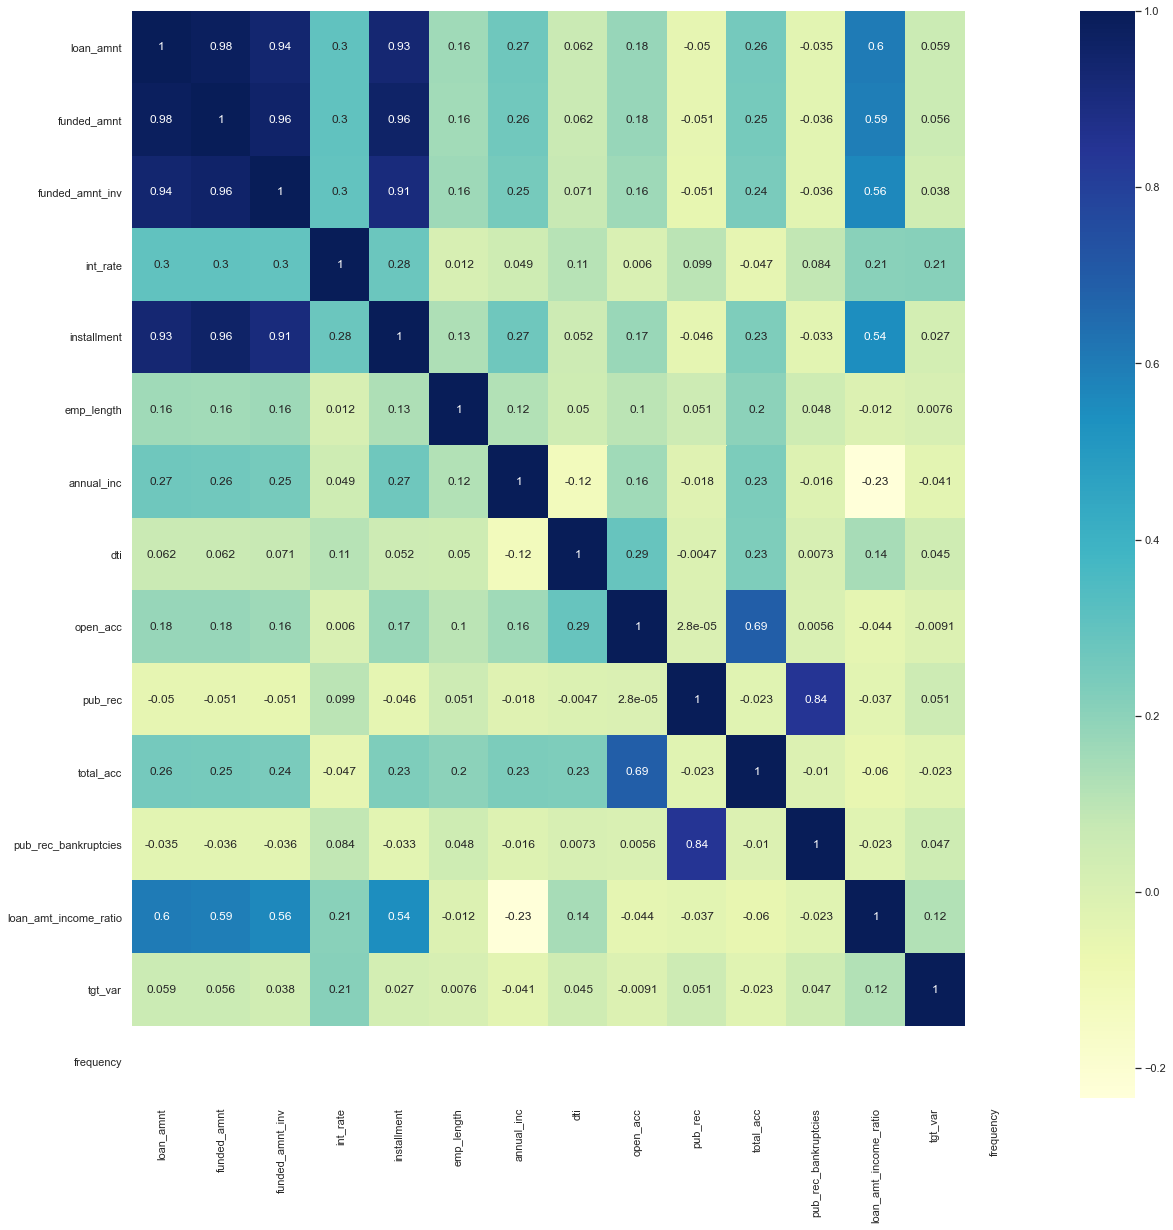

In [42]:
plt.subplots(figsize=(20, 20))
sns.heatmap(loan_corr, 
            xticklabels=loan_corr.columns.values,
            yticklabels=loan_corr.columns.values,cmap="YlGnBu",annot= True)
plt.show()

<font color='green'/>**Analysis** - It is clear from the following variables are directly correlated:
1. loan_amnt,funded_amnt,funded_amnt_inv,installment
3. pub_rec,pub_rec_bankruptcies
4. open_acc,total_acc

There is no significant inverse correlation.

We can select one of the columns from each group as they will have same impact on the target variable

#### ii. Loan Amount

In [43]:
plot_box_chart(pd.DataFrame(loan_df["loan_amnt"]))

<font color='green'/>**Analysis** - Most of the loan amount is distributed between **Rs. 5500 to Rs. 15000**. No significant outliers

#### iii.Annual Income

In [44]:
plot_box_chart(pd.DataFrame(loan_df["annual_inc"]))

<font color='green'/>**Analysis** - The income graph is skewed due to outliers in it.

In [45]:
loan_df["annual_inc"].describe(percentiles=[0.25,0.50,0.75,0.85,0.95,0.99,0.995])

count              38,577.00
mean               68,777.97
std                64,218.68
min                 4,000.00
25%                40,000.00
50%                58,868.00
75%                82,000.00
85%               100,000.00
95%               140,004.00
99%               234,144.00
99.5%             300,000.00
max             6,000,000.00
Name: annual_inc, dtype: float64

<font color='green'/>**Analysis** - Clearly there is a outlier beyond 95% distribution which needs to be corrected

In [46]:
outlier = loan_df["annual_inc"].quantile(0.995)
loan_df = loan_df[loan_df["annual_inc"] < outlier]
loan_df["annual_inc"].describe(percentiles=[0.25,0.50,0.75,0.85,0.95,0.99,0.995])
plot_box_chart(pd.DataFrame(loan_df["annual_inc"])) 

<font color='green'/>**Analysis** - Now, the annual income is distributed between **40k** and **81k**

#### iv. Interest Rate

In [47]:
plot_box_chart(pd.DataFrame(loan_df["int_rate"]))

<font color='green'/>**Analysis** - the interest rate is distributed between **9.07** and **14.54**

#### v. DTI

In [48]:
plot_box_chart(pd.DataFrame(loan_df["dti"]))

<font color='green'/>**Analysis** - DTI is distributed between **8.19** and **18.58**

#### vi. Target Variable Default Percent 

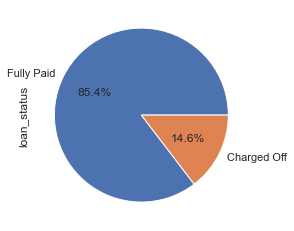

In [49]:
loan_df["loan_status"].value_counts(1).plot(kind="pie",autopct="%.1f%%")
plt.show()

<font color='green'/>**Analysis** - Charged off or default % is ~15%

#### vii. Employee Length 

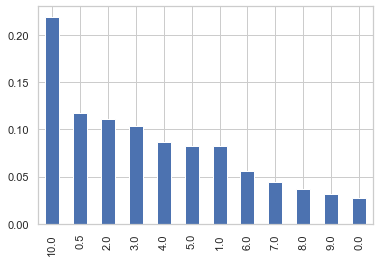

In [50]:
loan_df["emp_length"].value_counts(1).plot(kind="bar")
plt.show()

<font color='green'/>**Analysis** - Most % Customers applying for loan are of employee length 10+ years

### B. Categorical Variables

In [51]:
loan_df[cat_list].head(5)

term grade sub_grade home_ownership verification_status  loan_status  \
0   36 months  B     B2        RENT           Verified            Fully Paid    
1   60 months  C     C4        RENT           Source Verified     Charged Off   
2   36 months  C     C5        RENT           Not Verified        Fully Paid    
3   36 months  C     C1        RENT           Source Verified     Fully Paid    
5   36 months  A     A4        RENT           Source Verified     Fully Paid    

          purpose addr_state issue_month issue_year  
0  credit_card     AZ         Dec         2011       
1  car             GA         Dec         2011       
2  small_business  IL         Dec         2011       
3  other           CA         Dec         2011       
5  wedding         AZ         Dec         2011

**Plotting graphs for following variables -** 

1. addr_state
3. grade
4. home_ownership
5. issue_year
6. Sub_grade
7. purpose
8. term
9. verification_status

#### i. Addr_state

In [52]:
plot = loan_df.groupby("addr_state").frequency.count().reset_index()
plot_bar_chart(plot,"addr_state","frequency")

<font color='green'/>**Analysis** - Most of records are from CA

In [53]:
plot = loan_df.groupby("grade").frequency.count().reset_index()
plot_bar_chart(plot,"grade","frequency")

<font color='green'/>**Analysis** - Most of records are from grade B applicants.

In [54]:
plot = loan_df.groupby("home_ownership").frequency.count().reset_index()
plot_bar_chart(plot,"home_ownership","frequency")

<font color='green'/>**Analysis** - Most of records are from applicants with **Mortage** or **Rent** 

In [55]:
plot = loan_df.groupby("issue_year").frequency.count().reset_index()
plot_bar_chart(plot,"issue_year","frequency")

<font color='green'/>**Analysis** - Most of records are for applicants from 2011

In [56]:
plot = loan_df.groupby("sub_grade").frequency.count().reset_index()
plot_bar_chart(plot,"sub_grade","frequency")

<font color='green'/>**Analysis** - Most of applicants have subgrade in A or B Grade

In [57]:
plot = loan_df.groupby("purpose").frequency.count().reset_index()
plot_bar_chart(plot,"purpose","frequency")

<font color='green'/>**Analysis** - Most of applicants had taken loan for debt_consolidation

In [58]:
plot = loan_df.groupby("term").frequency.count().reset_index()
plot_bar_chart(plot,"term","frequency")

<font color='green'/>**Analysis** - Most of applicants had taken loan for 36 months rather than 60 months

In [59]:
plot = loan_df.groupby("verification_status").frequency.count().reset_index()
plot_bar_chart(plot,"verification_status","frequency")

<font color='green'/>**Analysis** - Most of applicants are not verified

## 4. Bivariate/Multivariate Analysis

##### From heatmap,we have selected only weak-correlated columns for analysis and taken single column from pairs of highly correlated columns

In [60]:
continous_var_list=["loan_amnt","int_rate","emp_length","annual_inc","dti","open_acc","pub_rec","tgt_var","loan_amt_income_ratio"]
print("Continous Variables:",continous_var_list)
print("Categorical Variables:",cat_list)

Continous Variables: ['loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'tgt_var', 'loan_amt_income_ratio']
Categorical Variables: ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'issue_month', 'issue_year']


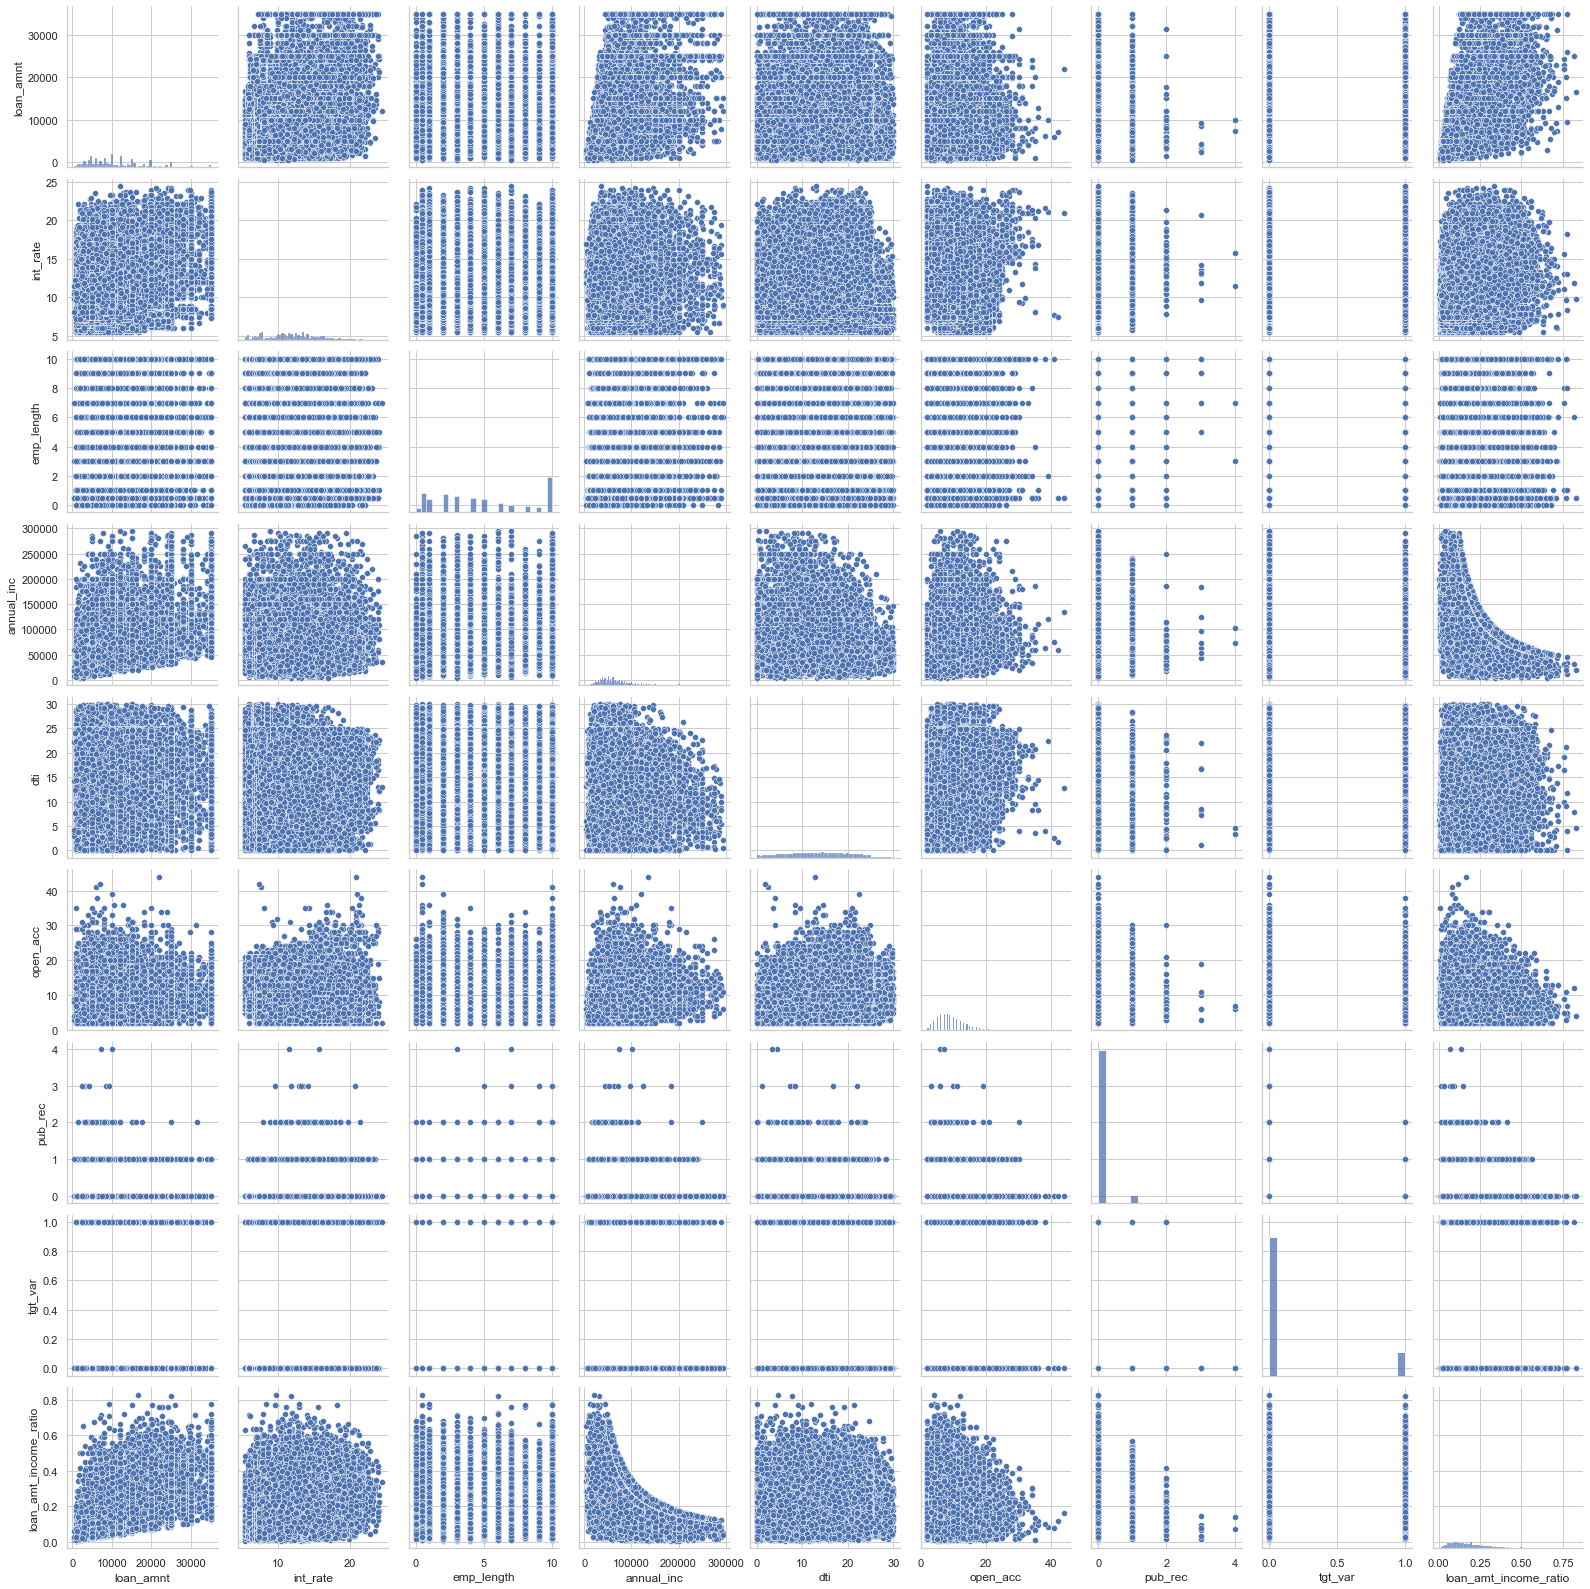

In [61]:
loan_df_temp=loan_df[continous_var_list]
sns.pairplot(loan_df_temp,height=2.5)

<font color='green'/>**Bivariate Analysis** - No new correlation found from overall pairplots

#### 1. Loan Amount vs Target Variable

tgt_var                               0                    1
loan_amt_bin                                                
(465.5, 3950.0]                   85.89                14.11
(3950.0, 7400.0]                  87.38                12.62
(7400.0, 10850.0]                 86.37                13.63
(10850.0, 14300.0]                86.41                13.59
(14300.0, 17750.0]                84.20                15.80
(17750.0, 21200.0]                83.00                17.00
(21200.0, 24650.0]                80.91                19.09
(24650.0, 28100.0]                80.40                19.60
(28100.0, 31550.0]                78.67                21.33
(31550.0, 35000.0]                75.11                24.89

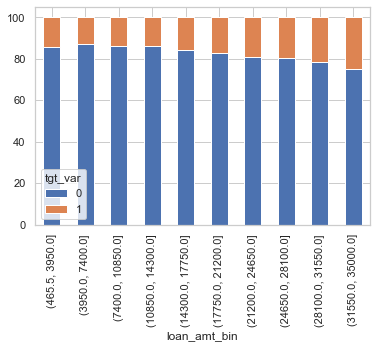

In [62]:
loan_df["loan_amt_bin"]=pd.cut(loan_df.loan_amnt,bins=10)
(loan_df.groupby(["loan_amt_bin"])['tgt_var'].value_counts(1)*100).unstack().plot(kind="bar",stacked=True)
(loan_df.groupby(["loan_amt_bin"])['tgt_var'].value_counts(1)*100).unstack()

<font color='green'/>**Bivariate Analysis** - Default Chances increase with loan amount

#### 2. Interst Rate vs Target Variable

<AxesSubplot:xlabel='int_rate_bin'>

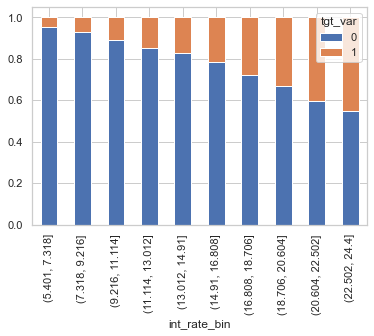

In [63]:
loan_df["int_rate_bin"]=pd.cut(loan_df.int_rate,bins=10)
loan_df.groupby(["int_rate_bin"])['tgt_var'].value_counts(1).unstack().plot(kind="bar",stacked=True)

<font color='green'/>**Bivariate Analysis** - Default Chances increase with interest rate

#### 3 .Emp Length vs     Target Variable

tgt_var                           0                    1
emp_length_bin                                          
(-0.01, 1.0]                  84.78                15.22
(1.0, 2.0]                    86.77                13.23
(2.0, 3.0]                    86.14                13.86
(3.0, 4.0]                    86.25                13.75
(4.0, 5.0]                    85.62                14.38
(5.0, 6.0]                    85.88                14.12
(6.0, 7.0]                    84.62                15.38
(7.0, 8.0]                    85.75                14.25
(8.0, 9.0]                    87.04                12.96
(9.0, 10.0]                   84.28                15.72

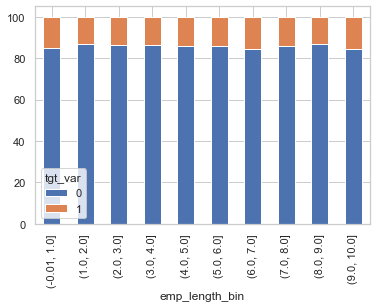

In [64]:
loan_df["emp_length_bin"]=pd.cut(loan_df.emp_length,bins=10)
(loan_df.groupby(["emp_length_bin"])['tgt_var'].value_counts(1)*100).unstack().plot(kind="bar",stacked=True)
(loan_df.groupby(["emp_length_bin"])['tgt_var'].value_counts(1)*100).unstack()

<font color='green'/>**Bivariate Analysis** - Following groups have higher default chances:
    9-10 years > 6-7 years > 0-1 years

#### 4 .Annual Income vs     Target Variable

tgt_var                             0                    1
annual_inc_bin                                            
(0, 20000]                      79.92                20.08
(20000, 40000]                  82.23                17.77
(40000, 60000]                  84.65                15.35
(60000, 80000]                  86.56                13.44
(80000, 100000]                 88.24                11.76
(100000, 120000]                89.52                10.48
(120000, 140000]                88.75                11.25
(140000, 160000]                88.17                11.83
(160000, 180000]                90.62                 9.38
(180000, 200000]                88.56                11.44

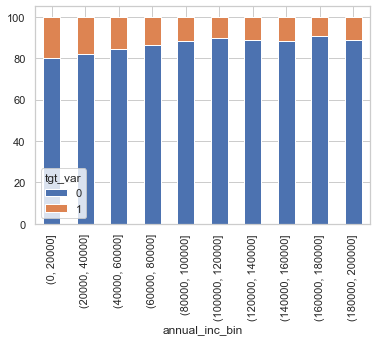

In [65]:
loan_df["annual_inc_bin"]=pd.cut(loan_df.annual_inc,bins=[0,20000,40000,60000,80000,100000,120000,140000,160000,180000,200000])
(loan_df.groupby(["annual_inc_bin"])['tgt_var'].value_counts(1)*100).unstack().plot(kind="bar",stacked=True)
(loan_df.groupby(["annual_inc_bin"])['tgt_var'].value_counts(1)*100).unstack()

<font color='green'/>**Bivariate Analysis** - Salaries <60k have atleast 15% chances to default

#### 5 .DTI vs     Target Variable

tgt_var                     0                    1
dti_bin                                           
(0, 5]                  87.79                12.21
(5, 10]                 87.17                12.83
(10, 15]                85.42                14.58
(15, 20]                84.24                15.76
(20, 25]                83.02                16.98
(25, 30]                86.01                13.99

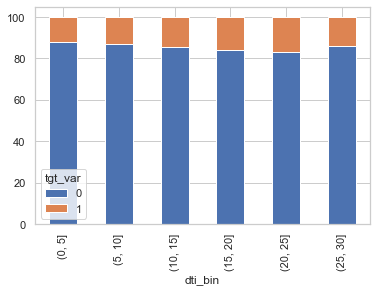

In [66]:
loan_df["dti_bin"]=pd.cut(loan_df.dti,bins=[0,5,10,15,20,25,30])
(loan_df.groupby(["dti_bin"])['tgt_var'].value_counts(1)*100).unstack().plot(kind="bar",stacked=True)
(loan_df.groupby(["dti_bin"])['tgt_var'].value_counts(1)*100).unstack()

<font color='green'/>**Bivariate Analysis** - DTI between 15 and 25 have atleast 15% chances to default

#### 6 .Open Account vs  Target Variable

tgt_var                         0                    1
open_acc_bin                                          
(0, 5]                      84.31                15.69
(5, 10]                     85.58                14.42
(10, 15]                    85.63                14.37
(15, 20]                    86.61                13.39
(20, 25]                    85.40                14.60
(25, 30]                    80.20                19.80
(30, 35]                    68.18                31.82
(35, 40]                    75.00                25.00
(40, 45]                   100.00 NaN

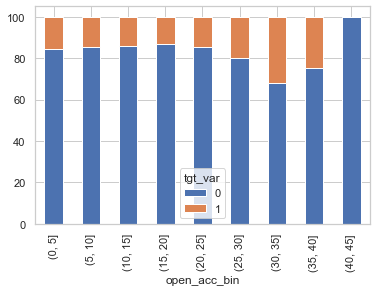

In [67]:
loan_df["open_acc_bin"]=pd.cut(loan_df.open_acc,bins=[0,5,10,15,20,25,30,35,40,45])
(loan_df.groupby(["open_acc_bin"])['tgt_var'].value_counts(1)*100).unstack().plot(kind="bar",stacked=True)
(loan_df.groupby(["open_acc_bin"])['tgt_var'].value_counts(1)*100).unstack()

<font color='green'/>**Bivariate Analysis** - More than 30 Open credit lines have 25%+ chances to default

#### 7 .Public Rec vs  Target Variable

tgt_var                        0                    1
pub_rec_bin                                          
(0, 1]                     77.29                22.71
(1, 2]                     79.17                20.83
(2, 3]                    100.00 NaN                 
(3, 4]                    100.00 NaN

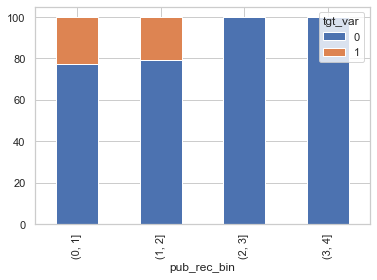

In [68]:
loan_df["pub_rec_bin"]=pd.cut(loan_df.pub_rec,bins=[0,1,2,3,4])
(loan_df.groupby(["pub_rec_bin"])['tgt_var'].value_counts(1)*100).unstack().plot(kind="bar",stacked=True)
(loan_df.groupby(["pub_rec_bin"])['tgt_var'].value_counts(1)*100).unstack()

<font color='green'/>**Bivariate Analysis** - Derogatory Public Record till 2 have higher chances to default

#### 8 .Term vs     Target Variable


<AxesSubplot:xlabel='term'>

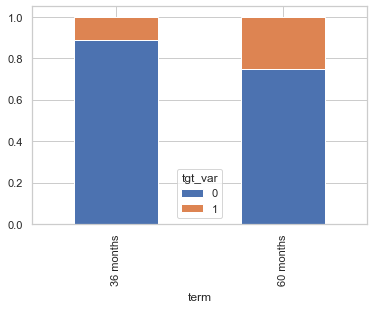

In [69]:
loan_df.groupby(["term"])['tgt_var'].value_counts(1).unstack().plot(kind="bar",stacked=True)

<font color='green'/>**Bivariate Analysis** - Default Chances are higher for 60 months term

#### 9 .Grade vs     Target Variable

<AxesSubplot:xlabel='grade'>

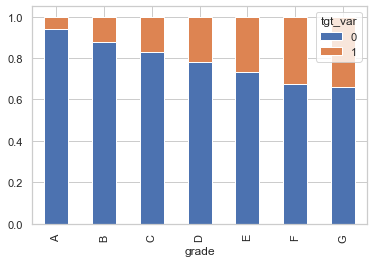

In [70]:
loan_df.groupby(["grade"])['tgt_var'].value_counts(1).unstack().plot(kind="bar",stacked=True)

<font color='green'/>** Bivariate Analysis** - Default Chances are higher 
as we progress from A to G. Grade F and G are the highest defaulter groups.

#### 10 .Subgrade vs     Target Variable

<AxesSubplot:xlabel='sub_grade'>

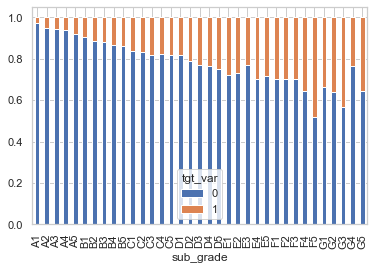

In [71]:
loan_df.groupby(["sub_grade"])['tgt_var'].value_counts(1).unstack().plot(kind="bar",stacked=True)

<font color='green'/>**Bivariate Analysis** - Default Chances are higher as we progress from subgrade A to G. Subgrade Grade F5 and G3 are the highest defaulter sub groups.

#### 11 .Homeownership vs     Target Variable

<AxesSubplot:xlabel='home_ownership'>

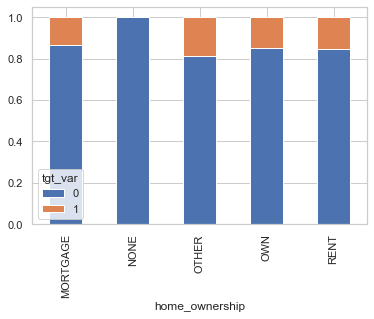

In [72]:
loan_df.groupby(["home_ownership"])['tgt_var'].value_counts(1).unstack().plot(kind="bar",stacked=True)

<font color='green'/>**Bivariate Analysis** - No significant homeonwership on Defaulting

#### 12 .Verification Status vs     Target Variable

<AxesSubplot:xlabel='verification_status'>

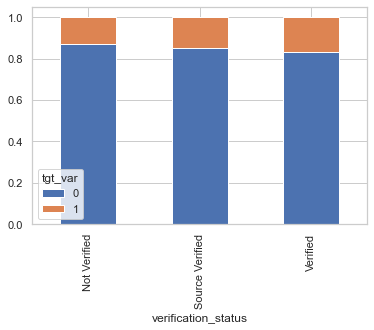

In [73]:
loan_df.groupby(["verification_status"])['tgt_var'].value_counts(1).unstack().plot(kind="bar",stacked=True)

<font color='green'/>**Bivariate Analysis** - No significant of Verification Status on Defaulting

#### 13 .Purpose  vs   Target Variable

<AxesSubplot:xlabel='purpose'>

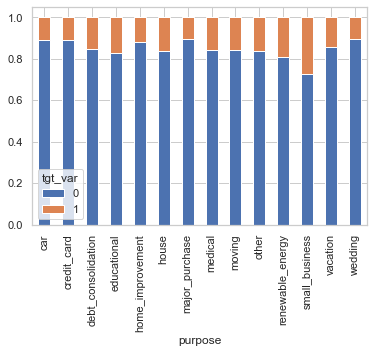

In [74]:
loan_df.groupby(["purpose"])['tgt_var'].value_counts(1).unstack().plot(kind="bar",stacked=True)

<font color='green'/>**Bivariate Analysis** - Small Business has higher chances of defaulting

#### 14 .Address State vs Target Variable

<AxesSubplot:xlabel='addr_state'>

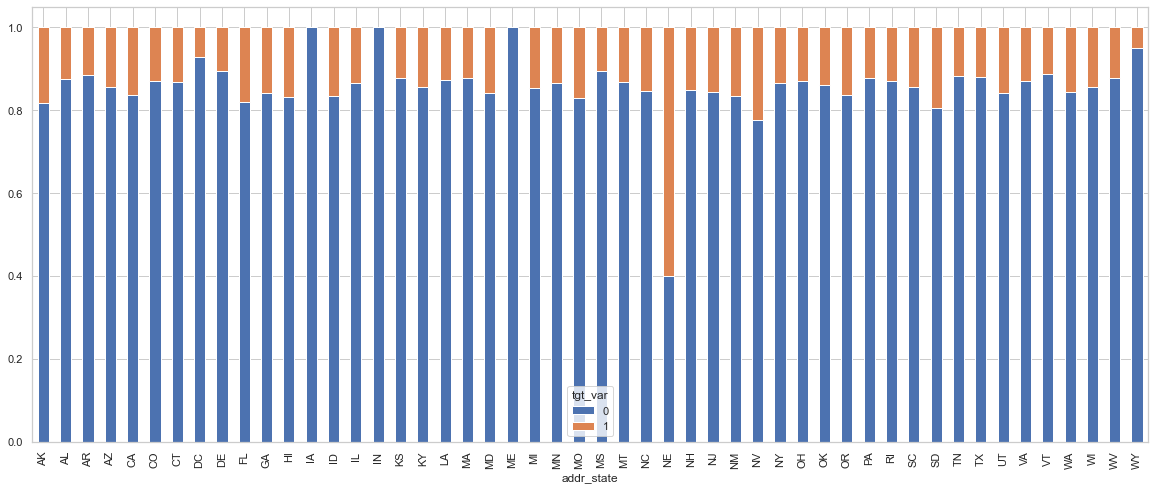

In [75]:
loan_df.groupby(["addr_state"])['tgt_var'].value_counts(1).unstack().plot(kind="bar",stacked=True,figsize=(20,8))

<font color='green'/>**Bivariate Analysis** - NE state customers have the highest chances of defaulting

#### 15 .Issue Month vs     Target Variable

<AxesSubplot:xlabel='issue_month'>

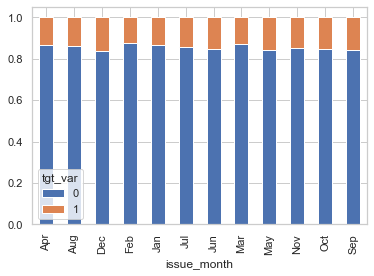

In [76]:
(loan_df.groupby(["issue_month"])['tgt_var'].value_counts(1)).unstack().plot(kind="bar",stacked=True)

<font color='green'/>**Bivariate Analysis** - Loan sanctioned in May,Sept and Dec have highest chances of defaulting 

#### 16 .Issue Year vs  Target Variable

tgt_var                       0                    1
issue_year                                          
2007                      82.33                17.67
2008                      84.19                15.81
2009                      87.35                12.65
2010                      87.14                12.86
2011                      84.09                15.91

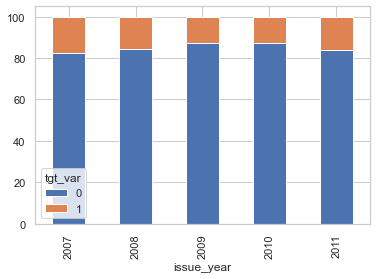

In [77]:
(loan_df.groupby(["issue_year"])['tgt_var'].value_counts(1)*100).unstack().plot(kind="bar",stacked=True)
(loan_df.groupby(["issue_year"])['tgt_var'].value_counts(1)*100).unstack()

<font color='green'/>**Bivariate Analysis** - There are increased cases on defaulting in 2007 and 2011

#### 17. Issue month, purpose vs  Target Variable

tgt_var                                       0                    1
issue_month purpose                                                 
Dec         small_business                72.38                27.62
            vacation                      85.00                15.00
May         small_business                72.50                27.50
            vacation                      75.68                24.32
Sep         small_business                64.38                35.62
            vacation                      86.67                13.33

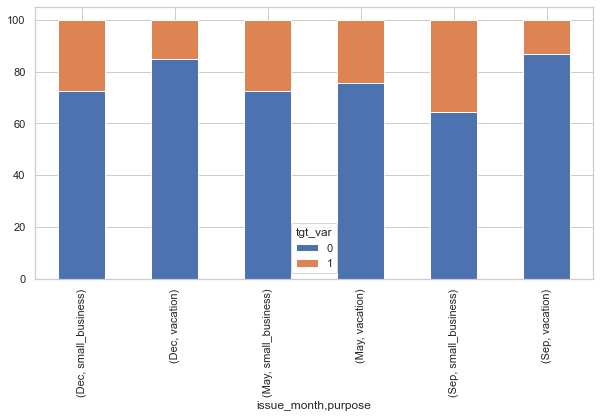

In [78]:

## Based on the univariate analysis - selecting the highest impact values from both month and purpose
(loan_df[((loan_df.issue_month.isin(["Dec","Sep","May"]) & 
                                   (loan_df.purpose.isin
                                   (["small_business","vacation"]))))].groupby(["issue_month","purpose"])['tgt_var'].value_counts(1)*100).unstack().plot(kind="bar",stacked=True,figsize=(10,5))
(loan_df[((loan_df.issue_month.isin(["Dec","Sep","May"]) & 
                                   (loan_df.purpose.isin
                                   (["small_business","vacation"]))))].groupby(["issue_month","purpose"])['tgt_var'].value_counts(1)*100).unstack()

<font color='green'/>**Multivariate Analysis** -  For vacation months of the year(May/Dec), small business and vacation loans have higher default chances

#### 19. Month vs Loan Amount vs Tgt Variable 

<AxesSubplot:xlabel='issue_month', ylabel='loan_amnt'>

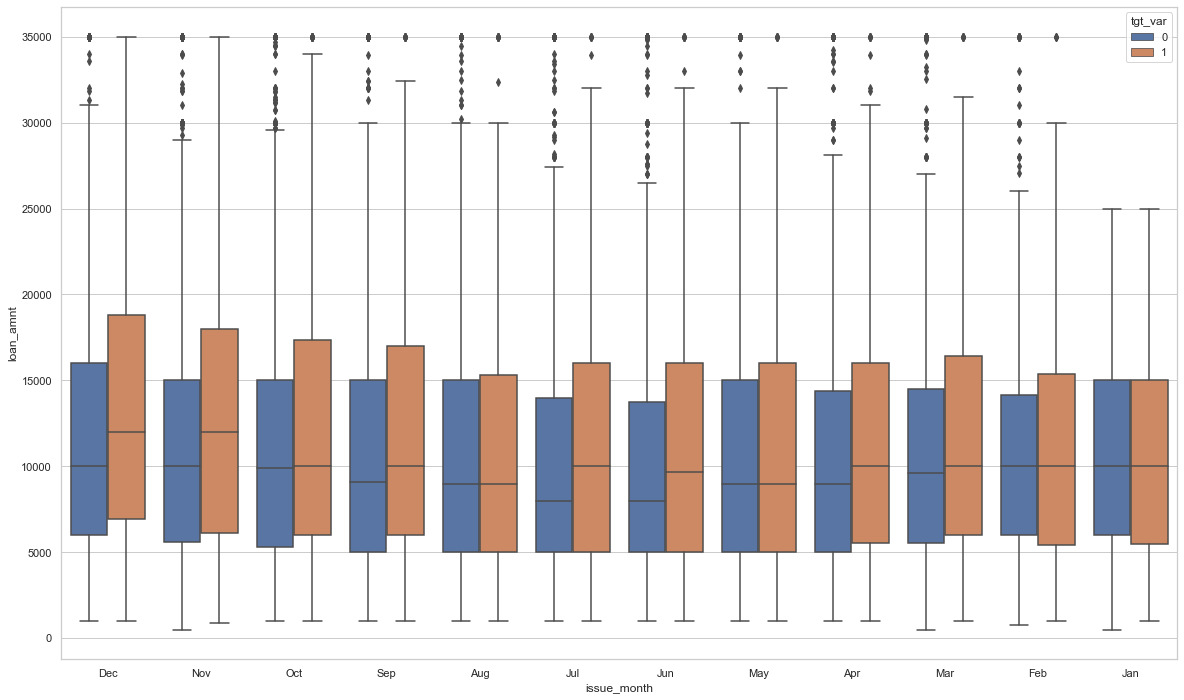

In [79]:
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'issue_month', y = 'loan_amnt', hue = 'tgt_var',data = loan_df)

<font color='green'/>**Multivariate Analysis** -  For Dec month, highest loan amount is sanctioned which got defaulted

##### 18. Loan Amount Income Ratio, Interest vs Target Variable

<AxesSubplot:xlabel='loan_amt_income_ratio_bin,int_rate_bin'>

<Figure size 1440x864 with 0 Axes>

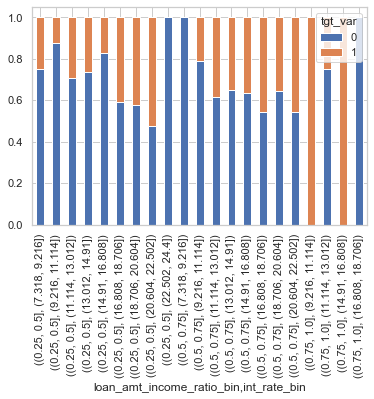

In [80]:
plt.figure(figsize=(20, 12))
loan_df["loan_amt_income_ratio_bin"]=pd.cut(loan_df.loan_amt_income_ratio,bins=[0,0.25,0.5,0.75,1]).astype("string")
loan_df[((loan_df.int_rate>8) & (loan_df.loan_amnt>20000) & (loan_df.annual_inc <60000))].groupby(["loan_amt_income_ratio_bin","int_rate_bin"])["tgt_var"].value_counts(1).unstack().plot(kind='bar',stacked=True)

<font color='green'/>**Multivariate Analysis** - High Risk Groups are as follows:

  1. Customers having loan_amount_income_ratio > 75% with interest rate b/w 9-11 %

  2. Customers having loan_amount_income_ratio > 75% with interest rate b/w 14-17%

#### 20. Categorical Variables vs Interest Rate vs Tgt Variable

<AxesSubplot:xlabel='verification_status', ylabel='int_rate'>

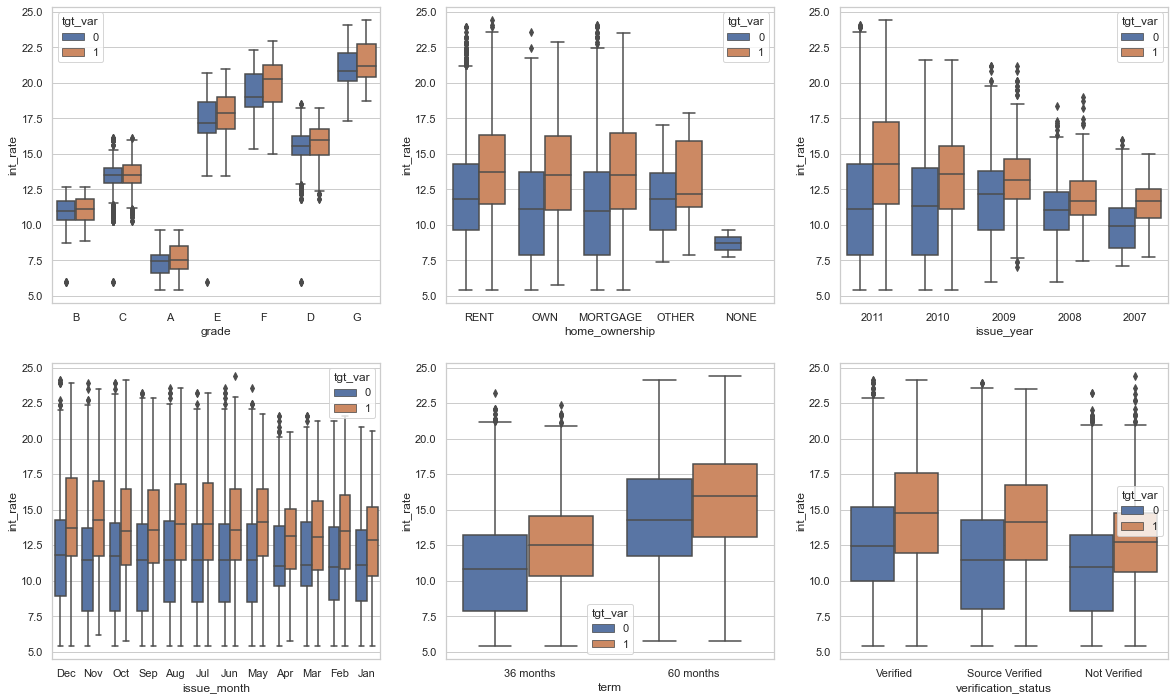

In [81]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'grade', y = 'int_rate', hue = 'tgt_var',data = loan_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'home_ownership', y = 'int_rate',hue = 'tgt_var', data = loan_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'issue_year', y = 'int_rate', hue = 'tgt_var',data = loan_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'issue_month', y = 'int_rate',hue = 'tgt_var', data = loan_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'term', y = 'int_rate',hue = 'tgt_var', data = loan_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'verification_status', y = 'int_rate', hue = 'tgt_var', data = loan_df)

<font color='green'/>**Multivariate Analysis** - Interest Rate are higher for applicants who have defaulted.

In [83]:
num_list = []
cat_list = []

for column in loan_df:
    if is_numeric_dtype(loan_df[column]):
        num_list.append(column)
    elif is_string_dtype(loan_df[column]):
        cat_list.append(column)    

print("Category Columns:",cat_list)
print("Continous Columns:",num_list)
df=getMetadata(loan_df.info

Category Columns: ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'issue_month', 'issue_year', 'loan_amt_income_ratio_bin']
Continous Columns: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'total_acc', 'pub_rec_bankruptcies', 'loan_amt_income_ratio', 'tgt_var', 'frequency']


<bound method DataFrame.info of        loan_amnt  funded_amnt      funded_amnt_inv        term  \
0      5000       5000                    4,975.00   36 months   
1      2500       2500                    2,500.00   60 months   
2      2400       2400                    2,400.00   36 months   
3      10000      10000                  10,000.00   36 months   
5      5000       5000                    5,000.00   36 months   
...     ...        ...                         ...         ...   
39712  2500       2500                    1,075.00   36 months   
39713  8500       8500                      875.00   36 months   
39714  5000       5000                    1,325.00   36 months   
39715  5000       5000                      650.00   36 months   
39716  7500       7500                      800.00   36 months   

                  int_rate          installment grade sub_grade  \
0                    10.65               162.87  B     B2         
1                    15.27               

### 5. Conclusion:

##### Values which are impacting the loan being charged-off

1. Grade F & G

2. 9-10+ Years Employee length

3. Purpose-Small Business & Vacation

4. Issue Month : July, Nov and Dec

5. Term- 60 months

6. Interest Rate: > 9%

7. Annual Income: <60k

8. State: Nebraska

9. Open Credit Line: 30+

10. Loan Amount: > 20k

11. DTI: 15-25